In [54]:
#Set API Key
#You will need an OpenAI API key to run this script!
#Use your own key where quoted in the API_KEY constant below.
#This will establish which key to charge for tokens!
#BE CAREFUL!!!
API_KEY = ""
#Set Other Constants
MODEL = "gpt-4o-mini"
IMAGE = "Logging.jpg"
PROMPT = "What’s in this image?"

In [12]:
from openai import OpenAI
import base64
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import matplotlib.pyplot as plt
#since Jupyter notebook for matplotlib to display in browser
#%matplotlib inline

In [4]:
client = OpenAI(api_key=API_KEY)

In [5]:
# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [59]:
#take a jpeg image and return text response about the image
def imageDescribe(api_key,image_path,mod,prompt):
    # Getting the base64 string
    base64_image = encode_image(image_path)
    
    headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {api_key}"
    }

    payload = {
      "model": mod,
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": prompt
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
    }
    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    response_json=response.json()
    content = response_json['choices'][0]['message']['content']
    return content

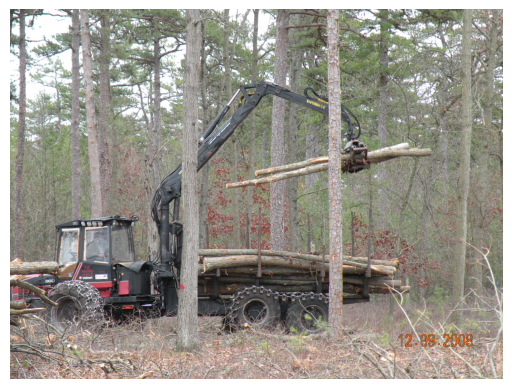

In [11]:
# Load the image
img = Image.open(IMAGE)
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [60]:
imageDescription = imageDescribe(API_KEY,IMAGE,MODEL,PROMPT)

In [61]:
print(imageDescription)

The image shows a logging machine, specifically a forwarder or a similar type of vehicle, working in a forested area. It appears to be lifting and transporting logs from the ground, with trees surrounding the machine. The scene suggests that logging operations are underway in a wooded environment.
